
# Bap's Coffee Mid-Year Sales Analysis

This notebook provides a step-by-step analysis of Bap's Coffee's sales data from January to July 2024. We will load the data, perform necessary cleaning, 
visualize sales trends, and generate insights to guide recommendations.


In [10]:

# Load necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Baps_Coffee_Sales_Data_Jan_July_2024.csv")

# Display the first few rows of the dataset
df.head()


,Transaction Date,Transaction Time,Product,Quantity,Total Price
0,2024-01-01,21:34:00,Mojos,3,315
1,2024-01-01,17:24:00,Mocha,3,480
2,2024-01-01,20:38:00,Chocolate Frappe,3,480
3,2024-01-01,01:27:00,Spanish Latte,1,160
4,2024-01-01,02:10:00,Biscoff (Coffee or None),2,340



### Data Cleaning

In this section, we will clean the data by verifying data types, removing duplicates, and pruning unnecessary columns.


In [11]:
# Check data types
df.info()

# Convert 'Transaction Time' to datetime format if it's not already
df['Transaction Time'] = pd.to_datetime(df['Transaction Time'], errors='coerce')

# Remove duplicates
df.drop_duplicates(inplace=True)

# Define store hours for each day
opening_hours = {
    'Monday': (10, 22),
    'Tuesday': (10, 22),
    'Wednesday': (10, 22),
    'Thursday': (10, 22),
    'Friday': (10, 22),
    'Saturday': (10, 22),
    'Sunday': (13, 22)
}

# Extract day and hour for filtering
df['Day'] = df['Transaction Time'].dt.day_name()
df['Hour'] = df['Transaction Time'].dt.hour

# Filter transactions within store hours
df = df[df.apply(lambda x: opening_hours.get(x['Day'], (0, 0))[0] <= x['Hour'] < opening_hours.get(x['Day'], (0, 0))[1], axis=1)]

# Drop unnecessary 'Day' and 'Hour' columns if you don't need them anymore
df.drop(columns=['Day', 'Hour'], inplace=True)

# Verify changes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4193 entries, 0 to 4192
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction Date  4193 non-null   object
 1   Transaction Time  4193 non-null   object
 2   Product           4193 non-null   object
 3   Quantity          4193 non-null   int64 
 4   Total Price       4193 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 163.9+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 2174 entries, 0 to 4192
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction Date  2174 non-null   object        
 1   Transaction Time  2174 non-null   datetime64[ns]
 2   Product           2174 non-null   object        
 3   Quantity          2174 non-null   int64         
 4   Total Price       2174 non-null   int64         
dtypes: datetime64[ns](1), int64(2), obje

C:\Users\Arwin Miclat\AppData\Local\Temp\ipykernel_14552\4063408933.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Transaction Time'] = pd.to_datetime(df['Transaction Time'], errors='coerce')



### Data Visualization

Here we create visualizations for:
1. Top-selling products
2. Sales by hour of day
3. Monthly sales trends


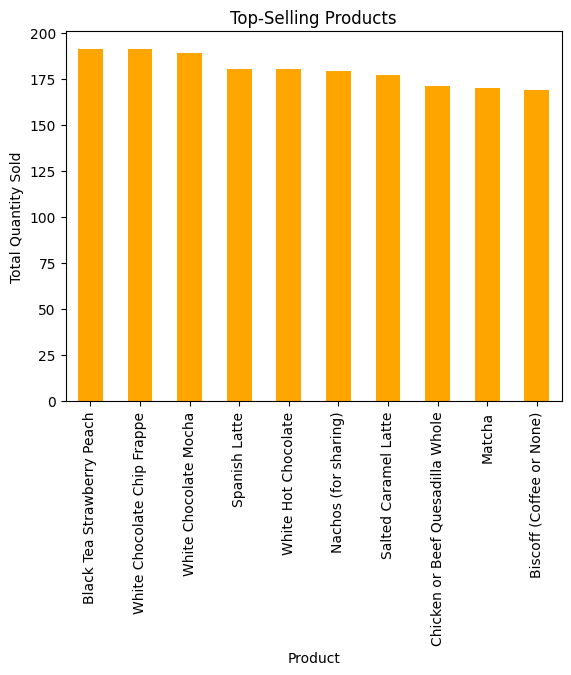

In [12]:

# Top-Selling Products
top_products = df.groupby('Product')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', color='orange', title='Top-Selling Products')
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.show()


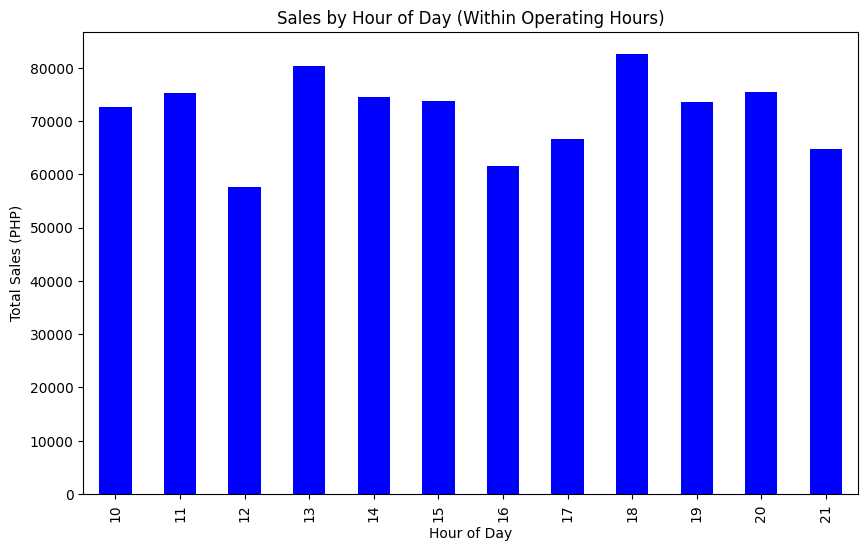

In [13]:

df['Transaction Time'] = pd.to_datetime(df['Transaction Time'], errors='coerce')

# Extract day and hour after conversion
df['Day'] = df['Transaction Time'].dt.day_name()
df['Hour'] = df['Transaction Time'].dt.hour

# Define store hours for each day
opening_hours = {
    'Monday': (10, 22),
    'Tuesday': (10, 22),
    'Wednesday': (10, 22),
    'Thursday': (10, 22),
    'Friday': (10, 22),
    'Saturday': (10, 22),
    'Sunday': (13, 22)
}

# Filter transactions within store hours
filtered_df = df[
    df.apply(lambda x: opening_hours.get(x['Day'], (0, 0))[0] <= x['Hour'] < opening_hours.get(x['Day'], (0, 0))[1], axis=1)
]

# Calculate sales by hour
sales_by_hour = filtered_df.groupby('Hour')['Total Price'].sum()

# Plot sales by hour
plt.figure(figsize=(10, 6))
sales_by_hour.plot(kind='bar', color='blue', title='Sales by Hour of Day (Within Operating Hours)')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales (PHP)')
plt.show()

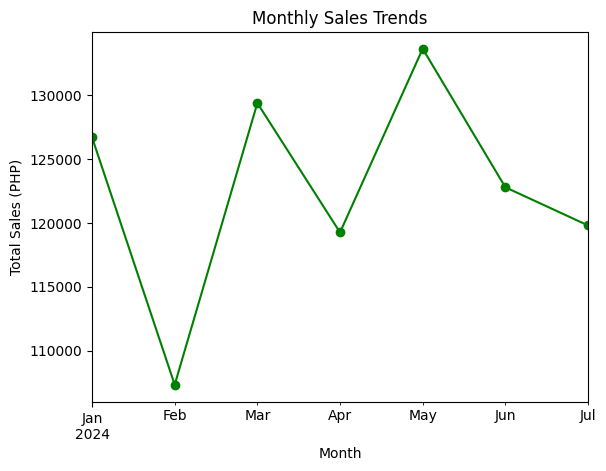

In [14]:

# Monthly Sales Trends
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
df['Month'] = df['Transaction Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Total Price'].sum()
monthly_sales.plot(kind='line', marker='o', color='green', title='Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales (PHP)')
plt.show()
